# TM mode field profiles #

This code plots the field profiles of a TM mode in a three-planar waveguide along the x-direction.

<br>

<div style="text-align: center;">
  <img src="planar_waveguide.png" width="300" heigth="200">
</div>

<br>

For the fields of TM modes, we have in this waveguide:

<br>

$$
E_{z}(x) = E_{0} 
\begin{cases}
  \sin(k_{f}a + \phi)e^{-\alpha_{c}(x-a)}\hspace{0.5cm};\hspace{0.2cm} x > a \\
  \sin(k_{f}x + \phi) \hspace{1.77cm};\hspace{0.1cm} |x| \le a \\
  -\sin(k_{f}a - \phi)e^{\alpha_{s}(x+a)} \hspace{0.38cm}; \hspace{0.2cm} x < -a
\end{cases}
$$

$$
E_{x}(x) = -jE_{0}\beta
\begin{cases}
  {\alpha_{c}}^{-1}\sin(k_{f}a + \phi)e^{-\alpha_{c}(x-a)} \hspace{0.5cm};\hspace{0.2cm} x > a \\
  {k_{f}}^{-1}\cos(k_{f}x + \phi) \hspace{1.77cm};\hspace{0.1cm} |x| \le a \\
  {\alpha_{s}}^{-1}\sin(k_{f}a - \phi)e^{\alpha_{s}(x+a)} \hspace{0.7cm}; \hspace{0.2cm} x < -a
\end{cases}
$$

$$
H_{y}(x) = jE_{0}\omega\epsilon_{0}
\begin{cases}
  \frac{{n_{c}^{2}}}{\alpha_{c}}\sin(k_{f}a + \phi)e^{-\alpha_{c}(x-a)} \hspace{0.5cm};\hspace{0.2cm} x > a \\ \\
  \frac{{n_{f}^{2}}}{k_{f}}\cos(k_{f}x + \phi) \hspace{1.77cm};\hspace{0.1cm} |x| \le a \\ \\
  \frac{{n_{s}^{2}}}{\alpha_{s}}\sin(k_{f}a - \phi)e^{\alpha_{s}(x+a)} \hspace{0.7cm}; \hspace{0.2cm} x < -a
\end{cases}
$$

Where $k_{i} = k_{0}\sqrt{{n_{i}}^{2} - {n_{eff}}^{2}}$ for $i = c, f, s$, and $\alpha_{i} = jk_{i}$ for $i = c, s$. Note in the file _Normalized propagation constant x normalized frequency for TE and TM modes_ that $1.5 \le n_{eff} < 3.5$ for all propagating modes, be they TE or TM. This means that $k_{c}$ and $k_{s}$ are imaginary constants, so $\alpha_{c}$ and $\alpha_{s}$ are real and positive constants. 

The constant $\phi$ is given by:

$$2\phi = m\pi + \arctan{\left(p_{c}\frac{w}{u}\right)} - \arctan{\left(p_{s}\frac{v}{u}\right)}$$

<br>

Where $u = ak_{f}$, $w = a\alpha_{c}$, $v = a\alpha_{s}$, $p_{c} = {\left(\frac{n_{f}}{n_{c}}\right)}^{2}$, $p_{s} = {\left(\frac{n_{f}}{n_{s}}\right)}^{2}$ and $m$ is the index of the analyzed mode.

## Starting the code: ##

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Basic parameters:

nf = 3.5
ns = 1.5
nc = 1

micrometers = 1e-6

a = 0.25 * micrometers

lmbd0 = 1.55 * micrometers # frequency: f = c / lambda
k0 = 2 * np.pi / lmbd0

## Obtaining the effective indices: ##

To obtain the effective indices for a given wavelength, we calculate the normalized frequency:

<br>

$$V = k_{0}a\sqrt{{n_{f}}^{2}-{n_{s}}^{2}}$$

<br>

And use the file _Normalized propagation constant x normalized frequency for TE and TM modes_ to obtain the effective indices of the propagating modes in the waveguide.

In [36]:
import Functions as funct

V = k0 * a * np.sqrt(nf**2 - ns**2)
b = funct.b_TM_modes(V, nf, ns, nc)
neff = np.sqrt(b*(nf**2 - ns**2) + ns**2) 

kf = k0 * np.sqrt(nf**2 - neff**2)
alpha_s = k0 * np.sqrt(neff**2 - ns**2)
alpha_c = k0 * np.sqrt(neff**2 - nc**2)

pc = (nf/nc)**2
ps = (nf/ns)**2

u = a *kf
w = a *alpha_c
v = a *alpha_s

## Calculating the field profiles: ##

In [37]:
def phi(m):
    arctan1 = np.arctan(pc * w[m]/u[m])
    arctan2 = np.arctan(ps * v[m]/u[m])
    return (m*np.pi + arctan1 - arctan2)/2

def Ez(E0, x, m):
    p = phi(m)

    x = np.asarray(x)
    region1 = (x > a)
    region2 = (x < -a)
    region3 = (np.abs(x) <= a)

    Ez = np.zeros_like(x)

    Ez[region1] = np.sin(kf[m] * a + p) * np.exp(-alpha_c[m] * (x[region1] -a))
    Ez[region2] = -np.sin(kf[m] * a - p) * np.exp(alpha_s[m] * (x[region2] + a)) 
    Ez[region3] = np.sin(kf[m] * x[region3] + p)

    return E0 * Ez

def Ex(E0, x, m):
    p = phi(m)
    beta = k0 * neff[m]

    x = np.asarray(x)
    region1 = (x > a)
    region2 = (x < -a)
    region3 = (np.abs(x) <= a)

    Ex = np.zeros_like(x)

    Ex[region1] = (1/alpha_c[m]) * np.sin(kf[m] * a + p) * np.exp(-alpha_c[m]* (x[region1] -a))
    Ex[region2] = (1/alpha_s[m]) * np.sin(kf[m] * a - p) * np.exp(alpha_s[m] * (x[region2] + a)) 
    Ex[region3] = (1/kf[m]) * np.cos(kf[m] * x[region3] + p)

    return -1j * E0 * beta * Ex

def Hy(E0, x, m):
    c = 3 * 1e8
    omega = k0 * c
    e0 = 1/(36*np.pi) * 1e-9
    p = phi(m)

    x = np.asarray(x)
    region1 = (x > a)
    region2 = (x < -a)
    region3 = (np.abs(x) <= a)

    Hy = np.zeros_like(x)

    Hy[region1] = (nc**2/alpha_c[m]) * np.sin(kf[m] * a + p) * np.exp(-alpha_c[m]* (x[region1] -a))
    Hy[region2] = (ns**2/alpha_s[m]) * np.sin(kf[m] * a - p) * np.exp(alpha_s[m] * (x[region2] + a)) 
    Hy[region3] = (nf**2/kf[m]) * np.cos(kf[m] * x[region3] + p)

    return 1j * E0 * omega* e0 * Hy

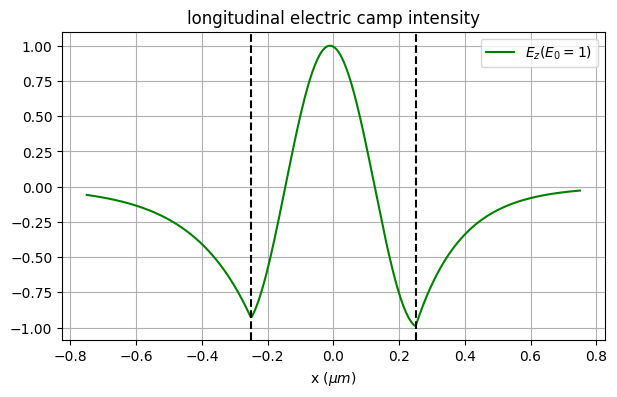

In [38]:
x = np.linspace(-3*a, 3*a, 401)
m = 1 # TE mode visualized

ez = Ez(1, x, m)
ex = np.abs(Ex(1, x, m))
hy = np.abs(Hy(1, x, m))

plt.figure(figsize=(7,4))
plt.plot(x*1e6, ez, label = r'$E_z (E_{0} = 1)$', color = 'green')
plt.xlabel(r'x ($\mu m$)')
plt.axvline(-a * 1e6, color = 'black', linestyle = '--')
plt.axvline(a * 1e6, color = 'black', linestyle = '--')
plt.grid(True)
plt.legend(loc = 'best')
plt.title(r'longitudinal electric camp intensity')
plt.show()

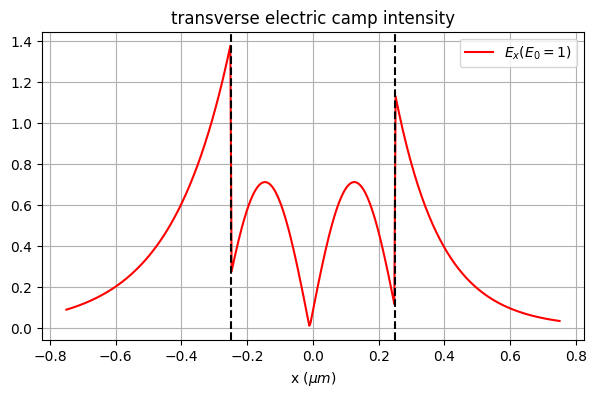

In [39]:
plt.figure(figsize=(7,4))
plt.plot(x*1e6, ex, label = r'$E_x (E_{0} = 1)$', color = 'red')
plt.xlabel(r'x ($\mu m$)')
plt.axvline(-a * 1e6, color = 'black', linestyle = '--')
plt.axvline(a * 1e6, color = 'black', linestyle = '--')
plt.grid(True)
plt.legend(loc = 'best')
plt.title(r'transverse electric camp intensity')
plt.show()

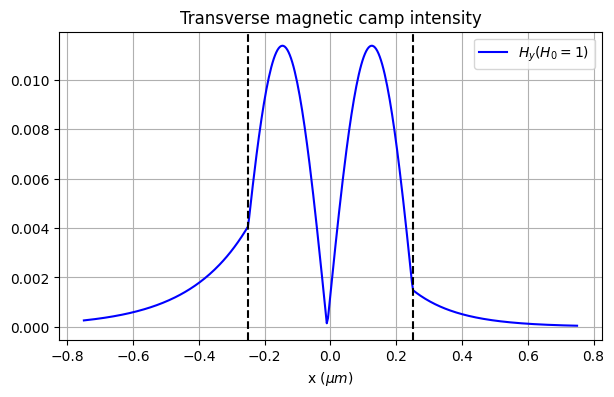

In [40]:
plt.figure(figsize=(7,4))
plt.plot(x*1e6, hy, label = r'$H_y (H_{0} = 1)$', color = 'blue')
plt.xlabel(r'x ($\mu m$)')
plt.axvline(-a * 1e6, color = 'black', linestyle = '--')
plt.axvline(a * 1e6, color = 'black', linestyle = '--')
plt.grid(True)
plt.legend(loc = 'best')
plt.title(r'Transverse magnetic camp intensity')
plt.show()